# General remarks

Work through the problems and fill in any place where it says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Once you have filled in a code cell with your solution to the problem, remove the `raise NotImplementedError()` statement.
But if you did not work on a particular problem or didn't come up with a solution, leave that statement in place.

Before you hand in your assignment on Canvas, make sure everything runs as expected.

> The easiest way to check this is to **restart the kernel and run all cells** 
> (in the menubar, select *Kernel$\rightarrow$Restart Kernel and Run All Cells...*) 

And, please, fill in your name(s) and group number in the cell below:

In [102]:
NAMES = "Carl Örnberg Jonathan Nguyen"                # fill in your name(s) between the quotes, comma separated if more than one
GROUP = "23"                # fill in your group number between the quotes

---

# Problem 1 (5 pts)

This problem is about complex numbers. Euler's formula says that

$$e^{i\phi} = \cos \phi + i \sin \phi$$

where $e$ is the base of the natural logarithm and $i$ is the square root of −1 (i.e. the imagninary unit).

Using the `cmath` module and a value of $\phi = 30^\circ$, calculate $e^{i\phi}$ and $\cos \phi + i \sin \phi$ and
check that they both give the same numerical value. Save the two results in variables `lhs` and `rhs` (short for *left hand side* and *right hand side*), respectively, because these are checked in an `assert` statement below.

*Note that, the `cmath` module does not provide functions `radians` and `complex`, which are part of the `math`
module, and you should provide a solution that doesn't need these.*

In [103]:
import cmath
phi = 30
phi_radians = phi*cmath.pi / 180
img = 1j
lhs = cmath.e**(img*phi_radians)
rhs = cmath.cos(phi_radians) + img*cmath.sin(phi_radians)
print(f"{lhs} {rhs}")

(0.8660254037844387+0.49999999999999994j) (0.8660254037844387+0.49999999999999994j)


In [104]:
assert lhs == rhs

# Problem 2

List and dictionary comprehension.

## Problem 2a: Lists (3 pts)

**Write a `for` loop** that produces the list of numbers of the form $\frac{1}{i^2}$ for $i = 1\ldots 10$ with alternate sign, i.e in Python the list would look like the following:

``` python
L1 = [1, -0.25, 0.1111111, -0.0625, ..., -0.01] 
```

Call your list `L1`. 

In [105]:
# YOUR CODE HERE
L1 = []
for i in range(1, 11):
    L1.append((-1)**(i+1)*1/i**2)
print(L1)

[1.0, -0.25, 0.1111111111111111, -0.0625, 0.04, -0.027777777777777776, 0.02040816326530612, -0.015625, 0.012345679012345678, -0.01]


In [106]:
# your list should pass the following tests

assert L1[0] == 1.0
assert L1[1] == -0.25
assert L1[9] == -0.01

## Problem 2b (3 pts)

Now, **produce the same list using list comprehension**. This time, store your list in a variable called `L2`.

In [107]:
# YOUR CODE HERE
L2 = [(-1)**(i+1)*1/i**2 for i in range(1, 11)]

In [108]:
# let's test that L1 and L2 agree

assert L1 == L2

## Problem 2c: Dictionaries (3 pts)

**Write a `for` loop** that produces a dictionary where the keys are strings of the form `<i> deg`, with
`i` ranging from 0 to 9, and the values are the sine function evaluated at `i` degrees:

```python
D1 = { '0 deg': 0.00000, '1 deg': 0.017452, '2 deg': 0.034899, ..., '9 deg': 0.156434 }
```

Call your dictionary D1.

In [109]:
# YOUR CODE HERE
import math
D1 = {}
for h in range(0, 10):
    D1[f"{h} deg"] = round(math.sin(h*cmath.pi/180).real, 6)
print(D1)


{'0 deg': 0.0, '1 deg': 0.017452, '2 deg': 0.034899, '3 deg': 0.052336, '4 deg': 0.069756, '5 deg': 0.087156, '6 deg': 0.104528, '7 deg': 0.121869, '8 deg': 0.139173, '9 deg': 0.156434}


In [110]:
# your dictionary should pass the following tests

assert D1.get("0 deg") == 0.0
assert abs(D1.get("9 deg") - 0.156434) < 1.0e-6 

## Problem 2d (3 pts)

Now, **produce the same dictionary using dictionary comprehension**. This time, store your dictionary in a variable called `D2`.

In [111]:
# YOUR CODE HERE
D2 = {f"{h} deg" : round(math.sin(h*cmath.pi/180), 6) for h in range(0, 10)}

In [112]:
# let's test that D1 and D2 agree

assert D1 == D2

# Problem 3 (10 pts)

Use a `for` loop to caclulate $\pi$ from **the first 20 terms** of the *Madhava series*:

$$\pi = \sqrt{12}\left(1-\frac{1}{3\cdot 3}+\frac{1}{5\cdot 3^2}-\frac{1}{7\cdot 3^3}+ \ldots \right)$$

Calculate the right hand side of that equation and store your result in a variable called `madhava`. 

We will test below that the absolute difference between 
your result and the "true" value of $\pi$ (i.e. `math.pi`) is less than $10^{-9}$.

*If you want, you may also provide a solution based on just one line of code. 
The `numpy` package is not needed here, but feel free to use it, if you think you can use it to your advantage.*

In [113]:
# YOUR CODE HERE
madhava = 0 #deklaraera variabel som ska ge madhava-serierna
for i in range(1, 21):
    madhava += math.sqrt(12) * (-1)**(i-1)/((1 + 2 * (i-1)) * 3**(i-1)) #lägger till varje nytt tal i madhava serien när i går från 1 till 20
print(madhava)

3.1415926535714034


In [114]:
print(madhava, math.pi)

assert abs(madhava - math.pi) < 1.0e-9

3.1415926535714034 3.141592653589793


# Problem 4

The *hailstone sequence* starting at an integer $n > 0$ is generated by the repeated application of the three rules:
* if $n = 1$, the sequence ends;
* if $n$ is even, the next number in the  sequence is $n/2$;
* if $n$ is odd, the next number in the  sequence is $3n + 1$.

## Problem 4a (8 pts)

Write a **generator function** `hailstone` (i.e. the function will be using the Python keyword `yield`,
rather than `return`), which "yields" the next number in the sequence. 

The function starts at an integer `n`,  which is passed as an argument to the function. 

**All numbers in the sequence should be integer!**

In [115]:
def hailstone(n):
    """Produce the hailstone sequence starting from n."""
    while n != 1: #kör en while loop så länge n inte är 1
        if n % 2 == 0: #kollar jämt eller udda tal
            n = n // 2
        else:
            n = 3*n + 1
        yield n  #utför sekvensen 
    return n
    # YOUR CODE HERE
    

You should now be able to get the sequence of numbers for a start value of **10**, by using the following code.

In [116]:
# just run this code cell and make sure it passes the assertions below

h10 = hailstone(10)

# h10 is now a generator object, which is iterable, so we can turn it into a list.
sequence = list(h10)
print(sequence)

# And the length of our sequence (which is called its *stopping time*) is simply:
print(len(sequence))

# starting with 10, as we did here should have produced the following list of length 6:
assert sequence == [5, 16, 8, 4, 2, 1]
assert len(sequence) == 6


[5, 16, 8, 4, 2, 1]
6


## Problem 4b (2 pts)

Print the *stopping times* for all sequences with start value $n$, where $n = 1\ldots 100$.
Your output should look like the following:
```
the stopping time for   1 is   0
the stopping time for   2 is   1
the stopping time for   3 is   7
the stopping time for   4 is   2
...
the stopping time for  97 is 118
the stopping time for  98 is  25
the stopping time for  99 is  25
the stopping time for 100 is  25
```

i.e. all integers should be printed with a width of 3, as they can be >= 100 and should be right aligned.

In [117]:
# YOUR CODE HERE
for i in range(1, 101):
    print(f"the stooping time for {i: >3} is {len(list(hailstone(i))): >3}")


the stooping time for   1 is   0
the stooping time for   2 is   1
the stooping time for   3 is   7
the stooping time for   4 is   2
the stooping time for   5 is   5
the stooping time for   6 is   8
the stooping time for   7 is  16
the stooping time for   8 is   3
the stooping time for   9 is  19
the stooping time for  10 is   6
the stooping time for  11 is  14
the stooping time for  12 is   9
the stooping time for  13 is   9
the stooping time for  14 is  17
the stooping time for  15 is  17
the stooping time for  16 is   4
the stooping time for  17 is  12
the stooping time for  18 is  20
the stooping time for  19 is  20
the stooping time for  20 is   7
the stooping time for  21 is   7
the stooping time for  22 is  15
the stooping time for  23 is  15
the stooping time for  24 is  10
the stooping time for  25 is  23
the stooping time for  26 is  10
the stooping time for  27 is 111
the stooping time for  28 is  18
the stooping time for  29 is  18
the stooping time for  30 is  18
the stoopi

Is there any sequence that does not stop? What would happen in that case?

YOUR ANSWER HERE

# Problem 5


| parameter | Earth value, $x_{i,\oplus}$ | weight $w_i$ |
|:----------|:----------------------------|:-------------|
| radius    | 1.0                         | 0.57         |
| density   | 1.0                         | 1.07         |
| escape velocity   | 1.0                 | 0.7          |
| surface temperature  | 288.0            | 5.58         |

The *Earth Similarity Index* (ESI) attempts to quantify the physical similarity between an astronomical body 
(usually a planet or moon) and Earth. If we have astronomical bodies numbered $j = 0\ldots n$, then the ESI of 
the $j$th body is defined by

$${\rm ESI}_j = \prod_{i=1}^{n} \left( 1 - \Big| \frac{x_{i,j}-x_{i,\oplus}}{x_{i,j}+x_{i,\oplus}} \Big| \right) ^{w_i/n}$$

where the parameters $x_{i,j}$ are described, and their terrestrial values, $x_{i,\oplus}$ and 
weights, $w_i$ given in the table above. This means, in the formula the product runs from $1\ldots n=4$, as we have four parameters. The ESI lies between 0 and 1, with values closer to 1 indicating closer similarity to Earth 
(which has an ESI of exacvtly 1: Earth is identical to itself!)

## Problem 5a (15 pts)

The file [ex2-6-g-esi-data.txt](https://scipython.com/static/media/problems/P2.6/ex2-6-g-esi-data.txt) contains
the earlier mentioned parameters for a range of astronomical bodies. Use these data to
calculate the ESI for each of the bodies. 

> *Note that, the file contains additional parameters that you won't use.* 
> *You are only interested in the columns with the parameters listed in the table above.*
>
> *This means when reading the file, you will have to skip the first three rows (the table header)*
> *and then extract columns 'radius', 'density', 'v_esc' and 'Tsurf'.*
> 
> *The weights are not part of the file, you will have to create a list of weights manually with the 
> values given above.*

Your solution should produce a table like the following, where the body's name is in a 20 character wide column
and the ESI for each body is printed with 3 decimals:

``` python
Earth                   1.000
Mars                    0.697
Mercury                 0.595
Moon                    0.557
...
```

In [3]:
# YOUR CODE HERE
import math
import os
print(os.getcwd())
f = open("\Users\carlo\Downloads/ex2-6-g-esi-data.txt", "r")
rader = f.readlines()[3:]

def dela(lista, d1, d2):
    """function that takes in three inputs, first one is a list, second and third is how much to slice away from the beggining and end of each string in the list"""
    n = len(lista)
    first_list = [lista[i][0:d1:].strip() for i in range(0, n)]
    second_list = [[float(element) for element in lista[i][d1:-d2:].strip().split()] for i in range(0, n)]
    return first_list, second_list


def trim(list):
   for i in range(0, 12):
      for j in [7, 5, 3, 0]:
        list[i].pop(j)
   return list

def ESI(data, weights):
    n = len(weights)
    resultat = []
    for i in range(0, len(data)):
        delresultat = [(1 - abs((data[i][j] - data[0][j]) / (data[i][j] + data[0][j])))**(weights[j]/len(weights)) for j in range(0, len(weights))]
        resultat.append(math.prod(delresultat))
    return resultat

planeter, data = dela(rader, 16, 2) 
data = trim(data)
weights_planets = [0.57, 1.07, 0.7, 5.58]
ESI_values = ESI(data, weights_planets)

for i in range(0, 12):
    print(f"{planeter[i].ljust(20)} {ESI_values[i]:.3f}")



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (1055419088.py, line 5)

## Problem 5b (3 pts)

Which of these astronomical bodies has properties “closest” to those of the Earth?

Mars

# Problem 6

In this exercise you will use the functions from the previous *matplotlib* exercise set to determine how some of the other planets of the solar system move with respect to the Earth. 

First we include again the pieces of code and arrays from the previous exercise set that describe the solar system and translate the orbits to cartesian $x, y, $ and $z$ coordinates.

*Just run all the code cells up to 'Problem 6a'.*

First the basic packages:

In [ ]:
# just run this code cell

# first, for later use, import all the necessary packages (redundant if already done earlier)
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

## Orbital elements (this is identical to the previous assignment on plotting).

Below you are given a dictionary, which contains a list of orbital (elliptical) elements for each planet. 

For those who are interested (but not required knowledge to solve this problem), these elements are:
* $a$ is the semi-major axis of the orbit in astronomical units astronomical units. This will be 1.0 by definition for the Earth.
* $e$ the eccentricity of the orbit, between $0\ldots 1$, the higher the value the more elliptical is the orbit.
* $i$ the inclination of the orbit, i.e. the angle between the planet's orbit and the plane of the Earth, in degrees.
* $\omega$ is the longitude of perihelion and defines the orientation of the ellipse in the orbital plane, in degrees.
* $\Omega$ is the longitude of the ascending node, in degrees.
* $P$ is the orbital period in units of years, again this is 1.0 for the Earth by definition.

In [ ]:
# just run this cell
#       name:  [a, e, incl, peri, node, period]
orb_elements = {
    "Mercury": [0.3871, 0.20564, 7.006, 77.46, 48.34, 0.241],
    "Venus":   [0.7233, 0.00676, 3.398, 131.77, 76.67, 0.615],
    "Earth":   [1.0, 0.01673, 0.0, 102.93, 0.0, 1.0],
    "Mars":    [1.5237, 0.09337, 1.852, 336.08, 49.71, 1.881],
    "Jupiter": [5.2025, 0.04854, 1.299, 14.27, 100.29, 11.87],
    "Saturn":  [9.5415, 0.05551, 2.492, 92.86, 113.64, 29.47], 
    "Uranus":  [19.188, 0.04689, 0.773, 172.43, 73.96, 84.05],
    "Neptune": [30.070, 0.00895, 1.770, 46.68, 131.79, 164.9],
    "Pluto":   [39.4821, 0.24883, 17.14, 113.76, 110.30, 247.94] 
}


*(Again, this is just copied from the previous assignment.)*

## Conversion to Cartesian coordinates

The following block of code may be used as "black box" to convert from orbital elements to cartesian coordinates 
$x$, $y$ and $z$ in the Solar system. 

**Note, that only the first five elements of the orbital parameters of a planet are used, the period is not used.**

The last parameter E is known as the eccentric anomaly, which is an angle (in radians) which specifies where in the orbit we are,
if should be specified as a single value or as a `numpy` vector for a range of values. 
*Varying E from 0 to $2\pi$ takes the planet around a full orbit.*

In [ ]:
# just run this code cell

def orbitalElements2Cartesian(a, e, I, peri, node, E):
    """ Convert orbital elements to Cartesian coordinates in the Solar System.

    Args: 
        a (float): semi-major axis (AU)
        e (float): eccentricity
        I (float): inclination (degrees)
        peri (float): longitude of perihelion (degrees)
        node (float): longitude of ascending node (degrees)
        E (float): eccentric anomaly (radians) ; this can be an array or single value

    """

    # The source of equations used:
    # http://farside.ph.utexas.edu/teaching/celestial/Celestialhtml/node34.html
        
    # Convert degrees to radians (using the map function, but you could have simply used (np.pi * angle/180.).
    I, peri, node = map(np.radians, [I, peri, node])

    # True anomaly (caculated from E and the eccentricity. Notice that for a circular orbit [e=0] theta and E are identical.
    theta = 2*np.arctan(np.sqrt((1.0 + e)/(1.0 - e))*np.tan(E/2.0))

    # Distance from the Sun to the point on orbit (notice again that for e=0, this is a circle with radius a)
    r = a*(1.0 - e*np.cos(E))

    # Cartesian coordinates
    x = r*(np.cos(node)*np.cos(peri + theta) - np.sin(node)*np.sin(peri + theta)*np.cos(I))
    y = r*(np.sin(node)*np.cos(peri + theta) + np.cos(node)*np.sin(peri + theta)*np.cos(I))
    z = r*np.sin(peri + theta)*np.sin(I)

    return x, y, z

## Problem 6a (12 pts)

Produce a function `plot_from_Earth` that plots the orbit of a planet **with respect to the Earth**. Do this in the projected $x, y$-plane. 
The function takes our dictionary from above as its first argument.

> Hint: You will need to calculate the position of the Earth as well as the position of the planet **at the same time**.
> But note that the periods are different. When Earth's 'eccentric anomaly' (angular position in the orbit) goes
> from $E=0$ to $E=2\pi$ in the course of 1 year, Mars for example takes 1.881 years to do the same.
> So when $E_{\rm earth}=\pi$, $E_{\rm mars}=\pi/1.881$, in other words you will need to calculate
> $E_{\rm planet}=E_{\rm Earth}/P_{\rm planet}$ where $P$ is the period.

Give your plot a title "Orbit of planet ... as seen from Earth", where you fill in the name of the planet for ...

In [ ]:
def plot_from_Earth(orb_elements, planet="Sun", norbits=2., t=0.):
    """Plot the orbit of a planet as seen from Earth.

    Args:
        orb_elements (dict): a dictionary giving the elliptical orbital elements.
        planet (str): the name of the planet for which the orbit should be plotted.
               Note if this is "Sun", you should simply calculate the Cartesian vector of Earth and use its negative.
        norbits (float) the number of orbits to plot, default 2.0
        t (float) a time (angle) in the interval 0...2*pi, which to mark along the orbit, default 0.0

    Returns:
        None
    """
    E_earth = np.linspace(0, 2*math.pi*norbits, int(t))
    a_e, e_e, incl_e, peri_e, node_e, period_e = orb_elements["Earth"]
    x_earth, y_earth, z_earth = orbitalElements2Cartesian(a_e, e_e, incl_e, peri_e, node_e,E_earth)
    if planet !="Sun":
        E = np.linspace(0, 2*math.pi*norbits / orb_elements[planet][5], int(t))
        a, e, incl, peri, node, period = orb_elements[planet]
        x, y, z = orbitalElements2Cartesian(a, e, incl, peri, node, E)
        x_final = x - x_earth 
        y_final = y - y_earth
    elif planet == "Sun":
        x_final = -1 * x 
        y_final = -1 * y

    plt.plot(x_final, y_final)
    plt.title(f"Orbit of planet {planet} as seen from Earth")
    
    



    

    
    
# YOUR CODE HERE


Test your function for planet Mars.

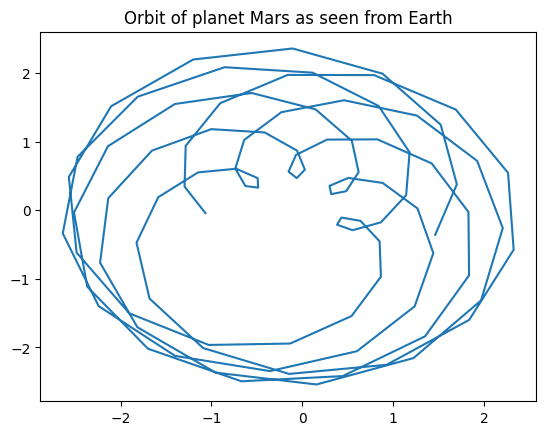

In [ ]:
plot_from_Earth(orb_elements, planet="Mars", norbits=10.0, t=100)

## Problem 6b (3 pts)

Also produce a second 3D-plot where you can select the viewing angle.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_from_Earth3D(orb_elements, planet="Sun", angle1=30.0, angle2=20.0, norbits=2., t=0.):
    """Same as above but in 3-D.

    Additional args:
       angle1, angle2 (float) the two angles to use when initializing the 3-D view, defaults 30.0 and 20.0m degress, respectively.
    """
   fig = plt.figure(figsize = (8, 6), dpi = 90)
   ax = plt.axes(projection = '3d')
#    ax.plot3D(x, y, z)
   ax.scatter3D(x, y, z)
   ax.view_init(angle2,angle1)
# Setting Axis labels
   ax.set_xlabel('X-Axis')
   ax.set_ylabel('Y-Axis')
   ax.set_zlabel('Z-Axis')

    

Again, test your function.

In [ ]:
plot_from_Earth3D(orb_elements, planet="Mars", angle1=5.0, angle2=20.0, norbits=10.)

# Problem 7

Download climate data from https://data.giss.nasa.gov/gistemp/graphs/graph_data/Temperature_Anomalies_over_Land_and_over_Ocean/graph.csv
and read in the data, which consists of measurements (both raw and smoothed) of the Mean Surface Air temperature anomaly over the Ocean and over Land areas. The description of the columns is provided in the file. Temperature anomaly means that it is the temperature difference with respect to an average. In this case the average temperature is that in the interval of 1951-1980. 

## Problem 7a (5 pts)

- Use `data = np.loadtxt(...)` to read the file and store the result in variable `data`. 
- Make a scatter plot of the measured anomalies (second and forth column) as a function of year (first column).
- Provide a title to the figure and axis-labels as well as a legend identifying the Ocean and Land area measurements.
- Add the smoothed data (third and fifth column) as lines (with legend).
- Add a dashed line through $y=0$

> Note, since this is a comma-separated (csv) file, you will need to use `delimiter=','` in `np.loadtxt` and argument `skiprows` 
> to skip the two header lines

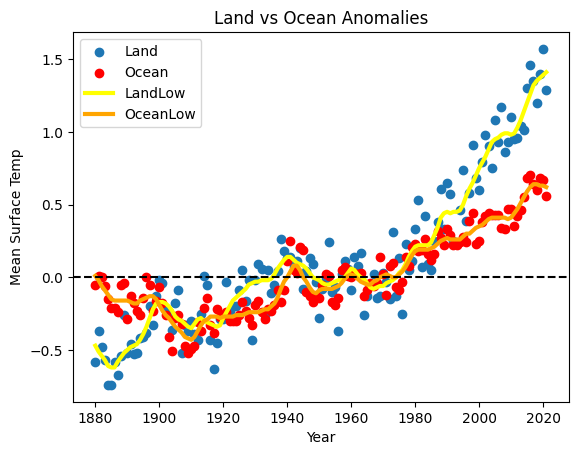

In [ ]:
import numpy as np

# YOUR CODE HER
data = np.loadtxt('graph.csv', delimiter=',', skiprows=2)

year = np.array([data[i , 0] for i in range(0,len(data))])
second_column = np.array([data[i, 1] for i in range(0,len(data))])
fourth_column = np.array([data[i, 3] for i in range(0, len(data))])
third_column = np.array([data[i, 2] for i in range(0, len(data))])
fifth_column = np.array([data[i, 4] for i in range(0, len(data))])


plt.scatter(year, second_column, label='Land')
plt.scatter(year, fourth_column, color='red', label='Ocean')
plt.plot(year, third_column, label = 'LandLow', color='yellow', linewidth=3)
plt.plot(year, fifth_column, label = 'OceanLow', color = 'Orange', linewidth=3)

plt.title('Land vs Ocean Anomalies')
plt.axhline(0, color='black', linestyle='--', linewidth=1.5)
plt.xlabel('Year')
plt.ylabel('Mean Surface Temp')

plt.legend()

In [ ]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
raise NotImplementedError()


NotImplementedError: 

## Problem 7b (7 pts)

- Now create a new plot where you plot, for each year (except the first), the difference to the previous year
  ($\Delta T_{\rm anomaly} = T_{\rm anomaly}(t)-T_{\rm anomaly}(t-1)$, where $t$ is the year. This will require some array manipulation).
  Do this for the Ocean and Land data as well as the smoothed data.

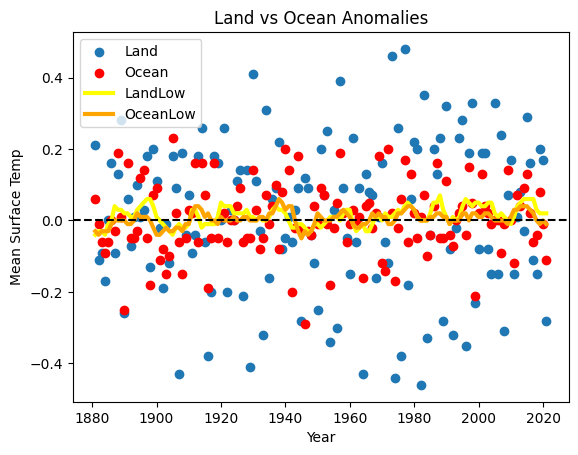

In [ ]:
# YOUR CODE HERE
delta_year = np.delete(year, 0)
delta_second_column = second_column[1:] - second_column[:-1]
delta_third_column = third_column[1:] - third_column[:-1]
delta_fourth_column = fourth_column[1:] - fourth_column[:-1] 
delta_fifth_column = fifth_column[1:] - fifth_column[:-1]



plt.scatter(delta_year, delta_second_column, label='Land')
plt.scatter(delta_year, delta_fourth_column, color='red', label='Ocean')
plt.plot(delta_year, delta_third_column, label = 'LandLow', color='yellow', linewidth=3)
plt.plot(delta_year, delta_fifth_column, label = 'OceanLow', color = 'Orange', linewidth=3)

plt.title('Land vs Ocean Anomalies')
plt.axhline(0, color='black', linestyle='--', linewidth=1.5)
plt.xlabel('Year')
plt.ylabel('Mean Surface Temp')

plt.legend()


## Problem 7c (3 pts)

- Create a histogram of the difference anomaly you calculated above for the 2nd plot of this problem. Use 20 bins and a range of `[-0.5, 0.5]`.
  Plot land and ocean observations with different colors, include a legend and add a vertical line for $x = 0$. 

> *Tip: use the ```alpha``` parameter of ```plt.hist``` to set the transparency of the histograms, because they will overlap.*

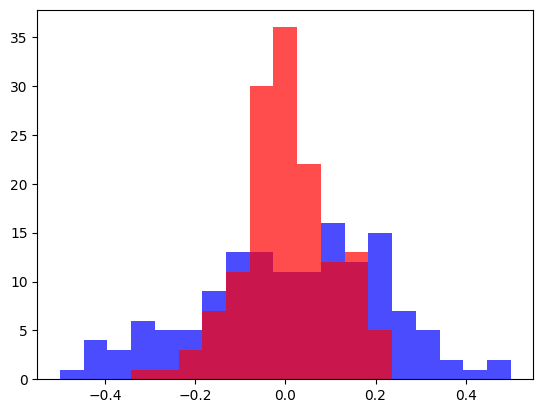

In [ ]:
# YOUR CODE HERE
bin = np.linspace(-0.5, 0.5, 20)

plt.hist(delta_second_column, bins = bin, color="blue", alpha=0.7)
plt.hist(delta_fourth_column, bins = bin, color="red", alpha=0.7)
plt.show()

## Problem 7d (5 pts)

- Calculate and print the ratio of positive over negative difference anomalies ($\Delta T_{\rm anomaly}$) for both Ocean and Land. 

> *Tip: use a combination of ```np.where``` and ```np.shape```*

Call your results `land_ratio` and `ocean_ratio`, respectively.

The answers should be $1.226$ above land (`land_ratio`) and $1.000$ above the Oceans (`ocean_ratio`). 

In [ ]:
# YOUR CODE HERE
positiv_ratio = np.where(delta_second_column > 0)
negativ_ratio = np.where(delta_second_column < 0)
positiv_count = np.shape(positiv_ratio)[1]  
negativ_count = np.shape(negativ_ratio)[1]
land_ratio = positiv_count / negativ_count

positiv_ratio = np.where(delta_fourth_column > 0)
negativ_ratio = np.where(delta_fourth_column < 0)
positiv_count = np.shape(positiv_ratio)[1]  
negativ_count = np.shape(negativ_ratio)[1]
ocean_ratio = positiv_count / negativ_count

In [ ]:
assert abs(land_ratio - 1.226) < 1.0e-3 
assert abs(ocean_ratio - 1.000) < 1.0e-3

# Problem 8 (10 pts)

You have seen how to make subplots using ```plt.subplots()```. Here you will make three subplots showing a function and its first and second derivative.

- Create a `numpy`  array with at least 100 equally spaced points from $[0,2\pi]$
- Create a function $f=2\sin^2{x}-1$
- Create a figure with 3 subplots **above each-other**, sharing the x-axis.
- Plot the function $f$ in the top panel
- Plot the derivative (simplified here by taking $f'(x') = {{f_{i+1}-f_{i}}\over{x_{i+1}-x_{i}}}$,
  where $x'$ is in the middle between $x_{i+1}$ and $x_i$) in the middle panel. 
- Plot the 2nd derivative $f''$ in the bottom panel (you can use your own defined function twice in this case).
- Give the whole figure a title "Plot of $f(x)$ and derivatives".

> Hint: You should write a function for the derivative.
> Use a function that takes the arrays for $x$ and $f(x)$ as inputs and returns two arrays:  $x'=(x_{i+1}+x_{i})/2$ **and** $f'(x')$.
> These arrays will be one element shorter than the input array, since we cannot calculate the values for the last point of the input array.

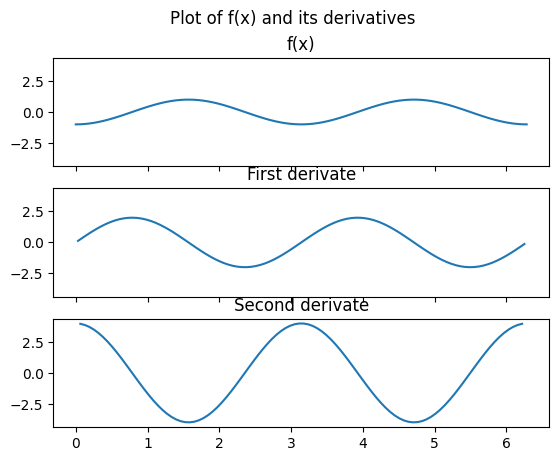

In [ ]:
# YOUR CODE HERE
fig, ax = plt.subplots(3, sharex=True, sharey=True)

x_dat = np.linspace(0, 2*math.pi, 100)
y_dat = 2 * np.sin(x_dat)**2 - 1
ax[0].plot(x_dat, y_dat)
ax[0].set_title('f(x)')

def derivate(x, y):
    x_prim = [(x[i + 1] + x[i]) / 2 for i in range(0, len(x) - 1)]
    y_prim = [(y[i + 1] - y[i]) / (x[i + 1] - x[i]) for i in range(0, len(x) - 1)]
    return x_prim, y_prim

x_pri, y_pri = derivate(x_dat, y_dat)
ax[1].plot(x_pri, y_pri)
ax[1].set_title('First derivate')

x_bis, y_bis = derivate(x_pri, y_pri)
ax[2].plot(x_bis, y_bis)
ax[2].set_title('Second derivate')

fig.suptitle('Plot of f(x) and its derivatives')

plt.show()


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()